In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
page_features = ['likes','visitors','daily_interest','category']
derived = ['derived_{}'.format(i) for i in range(1,26)]
essential_features = ['C_{}'.format(i) for i in range(1,6)]
base_features = ['base_time','post_length','share_count','promotion_status','H_hrs']
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
base_DT = ['BDT_Sun', 'BDT_Mon', 'BDT_Tue', 'BDT_Wed', 'BDT_Thu', 'BDT_Fri', 'BDT_Sat']
target = ['No_of_Comments_in_H_hours']
cols = page_features+derived+essential_features+base_features+weekday+base_DT+target

In [3]:
train1 = pd.read_csv(r"Training\Features_Variant_1.csv",
                    names = cols, header = None)
train2 = pd.read_csv(r"Training\Features_Variant_2.csv",
                    names = cols, header = None)
train3 = pd.read_csv(r"Training\Features_Variant_3.csv",
                    names = cols, header = None)
train4 = pd.read_csv(r"Training\Features_Variant_4.csv",
                    names = cols, header = None)
train5 = pd.read_csv(r"Training\Features_Variant_5.csv",
                    names = cols, header = None)

test1 = pd.read_csv(r"Testing\TestSet\Test_Case_1.csv",
                    names = cols, header = None)
test2 = pd.read_csv(r"Testing\TestSet\Test_Case_2.csv",
                    names = cols, header = None)
test3 = pd.read_csv(r"Testing\TestSet\Test_Case_3.csv",
                    names = cols, header = None)
test4 = pd.read_csv(r"Testing\TestSet\Test_Case_4.csv",
                    names = cols, header = None)
test5 = pd.read_csv(r"Testing\TestSet\Test_Case_5.csv",
                    names = cols, header = None)
test6 = pd.read_csv(r"Testing\TestSet\Test_Case_6.csv",
                    names = cols, header = None)
test7 = pd.read_csv(r"Testing\TestSet\Test_Case_7.csv",
                    names = cols, header = None)
test8 = pd.read_csv(r"Testing\TestSet\Test_Case_8.csv",
                    names = cols, header = None)
test9 = pd.read_csv(r"Testing\TestSet\Test_Case_9.csv",
                    names = cols, header = None)
test10 = pd.read_csv(r"Testing\TestSet\Test_Case_10.csv",
                    names = cols, header = None)

In [4]:
# Promotion Status contains a single value and hence is dropped
train1.drop('promotion_status', axis=1, inplace=True)
train2.drop('promotion_status', axis=1, inplace=True)
train3.drop('promotion_status', axis=1, inplace=True)
train4.drop('promotion_status', axis=1, inplace=True)
train5.drop('promotion_status', axis=1, inplace=True)

In [5]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   likes                      40949 non-null  int64  
 1   visitors                   40949 non-null  int64  
 2   daily_interest             40949 non-null  int64  
 3   category                   40949 non-null  int64  
 4   derived_1                  40949 non-null  float64
 5   derived_2                  40949 non-null  float64
 6   derived_3                  40949 non-null  float64
 7   derived_4                  40949 non-null  float64
 8   derived_5                  40949 non-null  float64
 9   derived_6                  40949 non-null  float64
 10  derived_7                  40949 non-null  float64
 11  derived_8                  40949 non-null  float64
 12  derived_9                  40949 non-null  float64
 13  derived_10                 40949 non-null  flo

In [6]:
# Standardizing the data
#scale = StandardScaler()
#train1.iloc[:,:-15] = scale.fit_transform(train1.iloc[:,:-15])
#train2.iloc[:,:-15] = scale.fit_transform(train2.iloc[:,:-15])
#train3.iloc[:,:-15] = scale.fit_transform(train3.iloc[:,:-15])
#train4.iloc[:,:-15] = scale.fit_transform(train4.iloc[:,:-15])
#train5.iloc[:,:-15] = scale.fit_transform(train5.iloc[:,:-15])

# Standardizing dependent variable
#train1.iloc[:,-1:] = scale.fit_transform(train1.iloc[:,-1:])
#train2.iloc[:,-1:] = scale.fit_transform(train2.iloc[:,-1:])
#train3.iloc[:,-1:] = scale.fit_transform(train3.iloc[:,-1:])
#train4.iloc[:,-1:] = scale.fit_transform(train4.iloc[:,-1:])
#train5.iloc[:,-1:] = scale.fit_transform(train5.iloc[:,-1:])

In [7]:
train1

,likes,visitors,daily_interest,category,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,...,Friday,Saturday,BDT_Sun,BDT_Mon,BDT_Tue,BDT_Wed,BDT_Thu,BDT_Fri,BDT_Sat,No_of_Comments_in_H_hours
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,1
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,2
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,1,0,0,72
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,28


In [8]:
X1 = train1.iloc[:,:-1]
y1 = train1.iloc[:,-1]
X2 = train2.iloc[:,:-1]
y2 = train2.iloc[:,-1]
X3 = train3.iloc[:,:-1]
y3 = train3.iloc[:,-1]
X4 = train4.iloc[:,:-1]
y4 = train4.iloc[:,-1]
X5 = train5.iloc[:,:-1]
y5 = train5.iloc[:,-1]

In [9]:
print(X1.shape)
print(y1.shape)
print(X2.shape)
print(y2.shape)
print(X3.shape)
print(y3.shape)
print(X4.shape)
print(y4.shape)
print(X5.shape)
print(y5.shape)

(40949, 52)
(40949,)
(81312, 52)
(81312,)
(121098, 52)
(121098,)
(160424, 52)
(160424,)
(199030, 52)
(199030,)


In [10]:
y = pd.concat([y1,y2,y3,y4,y5], axis=0)
y

0           0
1           0
2           0
3           0
4           0
         ... 
199025    203
199026     42
199027     51
199028     17
199029     21
Name: No_of_Comments_in_H_hours, Length: 602813, dtype: int64

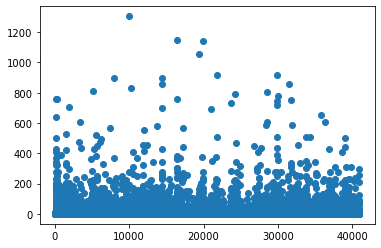

In [15]:
plt.scatter(train1.index, train1.No_of_Comments_in_H_hours)

In [16]:
X = pd.concat(
    [X1,X2,X3,X4,X5],
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
X.shape

(602813, 52)

# Hold Out Cross Validation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=23)

In [19]:
X_train.head()

,likes,visitors,daily_interest,category,derived_1,derived_2,derived_3,derived_4,derived_5,derived_6,...,Thursday,Friday,Saturday,BDT_Sun,BDT_Mon,BDT_Tue,BDT_Wed,BDT_Thu,BDT_Fri,BDT_Sat
10820,441554,0,60660,4,0.0,2328.0,71.828829,42.0,165.413643,0.0,...,0,0,0,0,0,0,0,1,0,0
30432,1128745,0,52663,9,0.0,614.0,48.874016,20.0,94.548658,0.0,...,0,0,0,0,0,0,1,0,0,0
40558,1426027,0,8025,1,0.0,214.0,9.719008,3.0,29.129016,0.0,...,0,0,0,0,0,0,1,0,0,0
15398,4526533,0,111134,9,0.0,752.0,65.810811,29.0,107.484339,0.0,...,0,0,0,0,0,0,0,1,0,0
35521,51890,0,4376,66,0.0,166.0,27.183099,22.0,27.070232,0.0,...,1,0,0,0,0,0,0,0,0,1


In [20]:
y_train

10820    0
30432    0
40558    2
15398    1
35521    0
        ..
6175     2
9704     1
11190    1
26569    0
9256     0
Name: No_of_Comments_in_H_hours, Length: 28664, dtype: int64

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

rmse = mean_squared_error(y_test,lr_pred, squared=False)
rmse

0.3724221141742722
0.17372545984193488


37.97600957154116

# Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(X_train,y_train)
dr_pred = dr.predict(X_test)
print(dr.score(X_train,y_train))
print(dr.score(X_test,y_test))

rmse = mean_squared_error(y_test,dr_pred, squared=False)
rmse

0.9999951401211508
0.32369050077940553


34.35736797586122

# Random Forest Regressor

In [24]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [i for i in range(1,21)]
# Maximum number of levels in tree
max_depth = [i for i in range(1,10)]
# Minimum number of samples required to split a node
min_samples_split = [i for i in range(1,20)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [i for i in range(1,11)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Grid search of parameters, using 3 fold cross validation, 
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, n_jobs = -1, return_train_score=True)
# Fit the random search model
rf_random.fit(X1, y1)

rf_random.best_params_

C:\Users\Amisha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5400 fits failed out of a total of 102600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Amisha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Amisha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Amisha\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Amisha\anaconda3\lib\sit

{'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 19}

In [36]:
from sklearn.ensemble import RandomForestRegressor

# define used regressor
#forest=RandomForestRegressor()

#Hyperparameters for X1 and y1
forest = RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=6,n_estimators=19)

# train model
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

rmse = mean_squared_error(y_test,forest_pred, squared=False)
rmse

0.8492847273485988
0.5373469173401986


28.41678050324951

[]

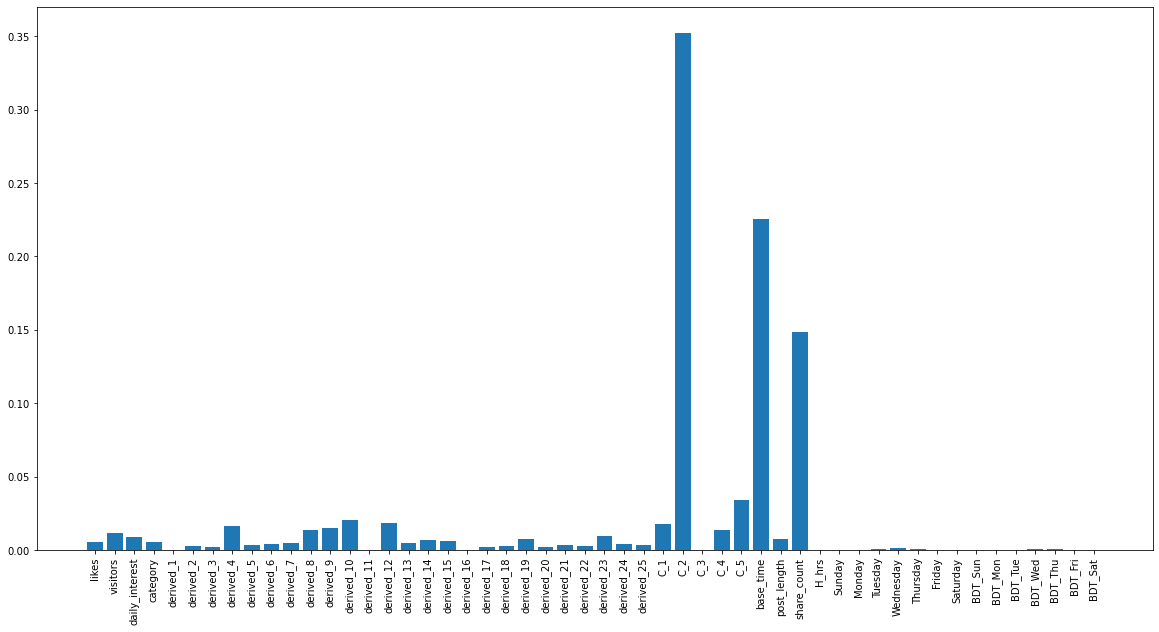

In [37]:
imp = forest.feature_importances_

feature_df = pd.DataFrame({'Features':X1.columns,'Importances':imp})
feature_df.set_index('Features')
plt.figure(figsize = (20,10))
plt.bar(x=feature_df['Features'],height=feature_df['Importances'])
plt.xticks(rotation=90)
plt.plot()

# XGBRegressor

In [28]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

rmse = mean_squared_error(y_test,xgb_pred, squared=False)
rmse

C:\Users\Amisha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Amisha\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.9873518291153885
0.5487211847596247


28.065295280716015

# Testing

In [29]:
# Promotion Status contains a single value and hence is dropped
# Promotion Status contains a single value and hence is dropped
test1.drop('promotion_status', axis=1, inplace=True)
test2.drop('promotion_status', axis=1, inplace=True)
test3.drop('promotion_status', axis=1, inplace=True)
test4.drop('promotion_status', axis=1, inplace=True)
test5.drop('promotion_status', axis=1, inplace=True)
test6.drop('promotion_status', axis=1, inplace=True)
test7.drop('promotion_status', axis=1, inplace=True)
test8.drop('promotion_status', axis=1, inplace=True)
test9.drop('promotion_status', axis=1, inplace=True)
test10.drop('promotion_status', axis=1, inplace=True)

In [30]:
#scale = StandardScaler()
#test1.iloc[:,:-15] = scale.fit_transform(test1.iloc[:,:-15])
#test2.iloc[:,:-15] = scale.fit_transform(test2.iloc[:,:-15])
#test3.iloc[:,:-15] = scale.fit_transform(test3.iloc[:,:-15])
#test4.iloc[:,:-15] = scale.fit_transform(test4.iloc[:,:-15])
#test5.iloc[:,:-15] = scale.fit_transform(test5.iloc[:,:-15])
#test6.iloc[:,:-15] = scale.fit_transform(test6.iloc[:,:-15])
#test7.iloc[:,:-15] = scale.fit_transform(test7.iloc[:,:-15])
#test8.iloc[:,:-15] = scale.fit_transform(test8.iloc[:,:-15])
#test9.iloc[:,:-15] = scale.fit_transform(test9.iloc[:,:-15])
#test10.iloc[:,:-15] = scale.fit_transform(test10.iloc[:,:-15])

#test1.iloc[:,-1:] = scale.fit_transform(test1.iloc[:,-1:])
#test2.iloc[:,-1:] = scale.fit_transform(test2.iloc[:,-1:])
#test3.iloc[:,-1:] = scale.fit_transform(test3.iloc[:,-1:])
#test4.iloc[:,-1:] = scale.fit_transform(test4.iloc[:,-1:])
#test5.iloc[:,-1:] = scale.fit_transform(test5.iloc[:,-1:])
#test6.iloc[:,-1:] = scale.fit_transform(test6.iloc[:,-1:])
#test7.iloc[:,-1:] = scale.fit_transform(test7.iloc[:,-1:])
#test8.iloc[:,-1:] = scale.fit_transform(test8.iloc[:,-1:])
#test9.iloc[:,-1:] = scale.fit_transform(test9.iloc[:,-1:])
#test10.iloc[:,-1:] = scale.fit_transform(test10.iloc[:,-1:])

In [31]:
tX1 = test1.drop('No_of_Comments_in_H_hours',axis=1)
ty1 = test1['No_of_Comments_in_H_hours']
tX2 = test2.drop('No_of_Comments_in_H_hours',axis=1)
ty2 = test2['No_of_Comments_in_H_hours']
tX3 = test3.drop('No_of_Comments_in_H_hours',axis=1)
ty3 = test3['No_of_Comments_in_H_hours']
tX4 = test4.drop('No_of_Comments_in_H_hours',axis=1)
ty4 = test4['No_of_Comments_in_H_hours']
tX5 = test5.drop('No_of_Comments_in_H_hours',axis=1)
ty5 = test5['No_of_Comments_in_H_hours']
tX6 = test6.drop('No_of_Comments_in_H_hours',axis=1)
ty6 = test6['No_of_Comments_in_H_hours']
tX7 = test7.drop('No_of_Comments_in_H_hours',axis=1)
ty7 = test7['No_of_Comments_in_H_hours']
tX8 = test8.drop('No_of_Comments_in_H_hours',axis=1)
ty8 = test8['No_of_Comments_in_H_hours']
tX9 = test9.drop('No_of_Comments_in_H_hours',axis=1)
ty9 = test9['No_of_Comments_in_H_hours']
tX10 = test10.drop('No_of_Comments_in_H_hours',axis=1)
ty10 = test10['No_of_Comments_in_H_hours']

### Linear Regression

In [32]:
test1_pred = lr.predict(tX1)
test2_pred = lr.predict(tX2)
test3_pred = lr.predict(tX3)
test4_pred = lr.predict(tX4)
test5_pred = lr.predict(tX5)

s1 = lr.score(tX1,ty1)
s2 = lr.score(tX2,ty2)
s3 = lr.score(tX3,ty3)
s4 = lr.score(tX4,ty4)
s5 = lr.score(tX5,ty5)
print(lr.score(tX1,ty1))
print(lr.score(tX2,ty2))
print(lr.score(tX3,ty3))
print(lr.score(tX4,ty4))
print(lr.score(tX5,ty5))

score = [s1,s2,s3,s4,s5]
print("\nAverage Accuracy:",np.mean(score))

mse1 = mean_squared_error(ty1,test1_pred)
mse2 = mean_squared_error(ty2,test2_pred)
mse3 = mean_squared_error(ty3,test3_pred)
mse4 = mean_squared_error(ty4,test4_pred)
mse5 = mean_squared_error(ty5,test5_pred)
print("\nTest Case 1:",mse1)
print("Test Case 2:",mse2)
print("Test Case 3:",mse3)
print("Test Case 4:",mse4)
print("Test Case 5:",mse5)

mse = [mse1,mse2,mse3,mse4,mse5]
print("\nAverage MSE:",np.mean(mse))

0.5197155654131105
0.47197306273735506
-0.9494848488017396
0.08920224073363137
0.5599190406778554

Average Accuracy: 0.13826501215204254

Test Case 1: 3390.758686915121
Test Case 2: 3906.9241115000355
Test Case 3: 3990.7395524274884
Test Case 4: 16474.31632508623
Test Case 5: 1686.5352868066514

Average MSE: 5889.854792547106


### Decision Tree

In [33]:
test1_pred = dr.predict(tX1)
test2_pred = dr.predict(tX2)
test3_pred = dr.predict(tX3)
test4_pred = dr.predict(tX4)
test5_pred = dr.predict(tX5)

s1 = dr.score(tX1,ty1)
s2 = dr.score(tX2,ty2)
s3 = dr.score(tX3,ty3)
s4 = dr.score(tX4,ty4)
s5 = dr.score(tX5,ty5)
print(dr.score(tX1,ty1))
print(dr.score(tX2,ty2))
print(dr.score(tX3,ty3))
print(dr.score(tX4,ty4))
print(dr.score(tX5,ty5))

score = [s1,s2,s3,s4,s5]
print("\nAverage Accuracy:",np.mean(score))

mse1 = mean_squared_error(ty1,test1_pred)
mse2 = mean_squared_error(ty2,test2_pred)
mse3 = mean_squared_error(ty3,test3_pred)
mse4 = mean_squared_error(ty4,test4_pred)
mse5 = mean_squared_error(ty5,test5_pred)

print("\nTest Case 1:",mse1)
print("Test Case 2:",mse2)
print("Test Case 3:",mse3)
print("Test Case 4:",mse4)
print("Test Case 5:",mse5)

mse = [mse1,mse2,mse3,mse4,mse5]
print("\nAverage MSE:",np.mean(mse))

-0.7815443797332398
0.6703139571028909
-1.1237240140671028
0.19587401167776874
-0.8950692550035357

Average Accuracy: -0.3868299360046437

Test Case 1: 12577.52
Test Case 2: 2439.38
Test Case 3: 4347.42
Test Case 4: 14544.86
Test Case 5: 7262.53

Average MSE: 8234.342


### Random Forest

In [38]:
test1_pred = forest.predict(tX1)
test2_pred = forest.predict(tX2)
test3_pred = forest.predict(tX3)
test4_pred = forest.predict(tX4)
test5_pred = forest.predict(tX5)
test6_pred = forest.predict(tX6)
test7_pred = forest.predict(tX7)
test8_pred = forest.predict(tX8)
test9_pred = forest.predict(tX9)
test10_pred = forest.predict(tX10)

s1 = forest.score(tX1,ty1)
s2 = forest.score(tX2,ty2)
s3 = forest.score(tX3,ty3)
s4 = forest.score(tX4,ty4)
s5 = forest.score(tX5,ty5)
s6 = forest.score(tX6,ty6)
s7 = forest.score(tX7,ty7)
s8 = forest.score(tX8,ty8)
s9 = forest.score(tX9,ty9)
s10 = forest.score(tX10,ty10)
print(forest.score(tX1,ty1))
print(forest.score(tX2,ty2))
print(forest.score(tX3,ty3))
print(forest.score(tX4,ty4))
print(forest.score(tX5,ty5))
print(forest.score(tX6,ty6))
print(forest.score(tX7,ty7))
print(forest.score(tX8,ty8))
print(forest.score(tX9,ty9))
print(forest.score(tX10,ty10))

score = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]
print("\nAverage Accuracy:",np.mean(score))

mse1 = mean_squared_error(ty1,test1_pred)
mse2 = mean_squared_error(ty2,test2_pred)
mse3 = mean_squared_error(ty3,test3_pred)
mse4 = mean_squared_error(ty4,test4_pred)
mse5 = mean_squared_error(ty5,test5_pred)
mse6 = mean_squared_error(ty6,test6_pred)
mse7 = mean_squared_error(ty7,test7_pred)
mse8 = mean_squared_error(ty8,test8_pred)
mse9 = mean_squared_error(ty9,test9_pred)
mse10 = mean_squared_error(ty10,test10_pred)

print("\nTest Case 1:",mse1)
print("Test Case 2:",mse2)
print("Test Case 3:",mse3)
print("Test Case 4:",mse4)
print("Test Case 5:",mse5)
print("Test Case 6:",mse6)
print("Test Case 7:",mse7)
print("Test Case 8:",mse8)
print("Test Case 9:",mse9)
print("Test Case 10:",mse10)

mse = [mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10]
print("\nAverage MSE:",np.mean(mse))

0.4380361712429548
0.6988015173097663
0.33583517966756016
0.2410868719490955
0.18599282341867496
0.4144711482150639
0.6347328256163216
0.35792677334756884
-0.300493149083054
0.5866871701523617

Average Accuracy: 0.3593077331836314

Test Case 1: 3967.4068049467605
Test Case 2: 2228.5976932733083
Test Case 3: 1359.594469000727
Test Case 4: 13727.059391145049
Test Case 5: 3119.5437974250394
Test Case 6: 946.3230058749219
Test Case 7: 1758.0665603848645
Test Case 8: 30584.405320730308
Test Case 9: 2788.393993464037
Test Case 10: 5865.50137415444

Average MSE: 6634.489241039945


### XGB

In [35]:
test1_pred = xgb.predict(tX1)
test2_pred = xgb.predict(tX2)
test3_pred = xgb.predict(tX3)
test4_pred = xgb.predict(tX4)
test5_pred = xgb.predict(tX5)

s1 = xgb.score(tX1,ty1)
s2 = xgb.score(tX2,ty2)
s3 = xgb.score(tX3,ty3)
s4 = xgb.score(tX4,ty4)
s5 = xgb.score(tX5,ty5)
print(xgb.score(tX1,ty1))
print(xgb.score(tX2,ty2))
print(xgb.score(tX3,ty3))
print(xgb.score(tX4,ty4))
print(xgb.score(tX5,ty5))

score = [s1,s2,s3,s4,s5]
print("\nAverage Accuracy:",np.mean(score))

mse1 = mean_squared_error(ty1,test1_pred)
mse2 = mean_squared_error(ty2,test2_pred)
mse3 = mean_squared_error(ty3,test3_pred)
mse4 = mean_squared_error(ty4,test4_pred)
mse5 = mean_squared_error(ty5,test5_pred)
print("\nTest Case 1:",mse1)
print("Test Case 2:",mse2)
print("Test Case 3:",mse3)
print("Test Case 4:",mse4)
print("Test Case 5:",mse5)

mse = [mse1,mse2,mse3,mse4,mse5]
print("\nAverage MSE:",np.mean(mse))

0.3108061684608596
0.8505155486230084
0.024107431308627247
0.16465365297860957
-0.4097808431014862

Average Accuracy: 0.18806039165392371

Test Case 1: 4865.637532621066
Test Case 2: 1106.0504041834984
Test Case 3: 1997.7242065720668
Test Case 4: 15109.567213824168
Test Case 5: 5402.7448545307825

Average MSE: 5696.344842346316
